![](https://import.cdn.thinkific.com/220744/BExaQBPPQairRWFqxFbK_logo_mastermind_web_png)

Bienvenidos a este último _Notebook_, en el que repasaremos todo lo hecho en el **Proyecto Final**!

Recordad que este _Notebook_ está pensado a modo de apuntes!

# Proyecto

Hemos llegado a nuestro despacho y nos ha llegado el primer pedido de nuestro cliente. Lo quiere saber todo sobre pokémon, y nos ha lanzado 7 preguntas que necesita contestar lo antes posible:

    - Cual es el tipo de pokémon más comun?
    - Cuántos pokemon legendarios hay en cada generación?
    - Su poder cambia generación tras generacion?
    - Cuál es el tipo de Pokémon más poderoso?
    - Cuales son los más grandes? y pesados? y los más densos?
    - Cuántos son machos? y cuántos hembra?
    - Cuántos pokémon tienen más ataque que defensa? Y viceversa?
    
Antes de saber lo que Lo primero que haremos será definir qué debemos hacer para responder a las preguntas que tenemos sobre nuestros pokémon. Como decíamos, la típica estructura de un proyecto de estas características se compone de estos pasos:

    1- Conseguir y importar los datos
    2- Limpieza y manipulación de datos
    3- Análisis visual exploratorio (o sea, resolver las preguntas que tenemos con técnicas visuales, lo que en inglés se entiende como EDA (Exploratory Data Analysis)
    

# Importando librerías

In [11]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Consiguiendo datos

## Pokémon de generaciones anteriores

Para cambiar un poco, vamos a automatizar en este caso el proceso de descargar nuestros datos de pokemon desde un link, guardarlo en el formato zip que viene, y importarlo como un dataframe directamente desde Python. Lo haremos porque en esta clase de proyectos, todo lo que podamos automatizar ayudará a que se pueda replicar en otros entornos. Además, si nos acostumbramos a hacer este tipo de acciones en código, seremos mucho mas ágiles en el futuro.

Para hacer esto, vamos a planear los pasos que tendremos que realizar para poder conseguir nuestro archivo:

    - Conseguir el link de descarga del archivo .zip
    - Descargar el archivo a nuestro pc
    - Descomprimir el archivo zip
    - Construir dataframe
    

### Conseguir el link

En este caso, vamos a usar dos links directamente de la plataforma de **Mastermind**, que he subido personalmente, para asegurar que estos archivos son seguros y que no contienen ningún software malicioso. Me he asegurado de ello. Tenéis el link en el [capítulo Pokemon Dataset](https://www.mastermind.ac/courses/take/intro-datascience/downloads/33606610-pokemon-dataset).

Primero haremos los pasos para descargar, descomprimir y asignar a un dataframe el primero de los archivos:

In [12]:
url = 'https://import.cdn.thinkific.com/220744/courses/1648061/pokemon_dataset-220322-181028.zip'

### Descargar el archivo desde un link

Para descargar el archivo, usaremos una librería de **Python** llamada _URLLIB_, encargada de toda la gestión de direcciones de internet, como abrir webs, descargar archivos por protocolo HTTP, etc. De este módulo, importaremos la sección request. Como segundo parámetro pasamos la ruta de dónde queremos  descarga del archivo.

In [13]:
import urllib.request


### Descomprimir nuestro archivo zip

Una vez descargado nuestro archivo zip, vamos a descomprimirlo, como hacemos en nuestro escritorio. La diferencia es que en este caso, todo el contenido de nuestro archivo lo guardaremos en una variable, directamente en nuestra memoria RAM, por lo que no veremos este archivo descomprimido en nuestra carpeta. Para los que os preguntéis si se puede descomprimir en el escritorio: si, se puede. Pero en este caso estaríamos duplicando espacio en nuestro disco innecesariamente, a sí que lo haremos de esta manera. Para descomprimir nuestro archivo, usaremos la librería ZIPFILE, que ya la tenemos instalada en nuestro sistema.

In [14]:
from zipfile import ZipFile

In [15]:
from google.colab import drive
drive.mount('/content/drive')
pokemon_zip = ZipFile('/content/drive/MyDrive/Colab Notebooks/Mastermind_colab/Mastermind_notebooks/Introducción a Data Science/Notebook proyecto final/pokemon_dataset-220322-181028 (1).zip')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Miraremos el contenido de nuestro archivo ZIP para ver cuál es el archivo que tenemos que descomprimir

In [16]:
pokemon_zip.filelist

[<ZipInfo filename='pokedex_mastermind.csv' compress_type=deflate filemode='-rw-r--r--' file_size=163483 compress_size=35537>]

### Construir DataFrame

In [17]:
df = pd.read_csv(pokemon_zip.open('pokedex_mastermind.csv'), index_col=[0])

In [18]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


# Limpieza y manipulación de datos

## Identificando problemas

Lo primero que haremos será una una pequeña exploración para identificar posibles problemas que podamos tener y empezar a limpiar nuestro dataset. En este caso, el dataset original que he obtenido de Kaggle estaba demasiado limpio, por lo que he introducido algunas pequeñas trampitas para simular lo que nos solemos encontrar cuando trabajamos con datos que no conocemos. Para encontrar los errores que comentabamos al inicio del capítulo, usaremos las funciones de Pandas que nos ayudan a tener una mejor comprensión sobre qué contiene nuestro dataset. Pero antes, vamos a repasar cuáles eran estos pasos:

1 - Quitar duplicados o datos irrelevante  
2 - Arreglar errores estructurales  
3 - Filtrar outliers, o datos atípicos  
4 - Lidiar con datos vacíos  
5 - Validar si los datos nos sirven  

### Quitar duplicados

En este caso no tenemos este problema. Pero cómo podemos verificarlo? Usaremos una función de Pandas específica para ello, el método `df.duplicated()`

In [19]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1040    False
1041    False
1042    False
1043    False
1044    False
Length: 1045, dtype: bool

Nos devuelve una máscara booleana para indicar si hay alguna fila repetida. Para ver un resumen de los valores, podemos usar o `df.unique()` o `df.value_counts()`

In [20]:
df.duplicated().unique()

array([False])

In [21]:
df.duplicated().value_counts()

False    1045
dtype: int64

### Arreglar errores estructurales

Para fijarnos si tenemos problemas en los nombres, tipos de datos, o problemas en sus formatos, usaremos la función `head, tail y sample`, para hacernos una idea de nuestro dataframe:

In [22]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [23]:
df.tail()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1040,896,Glastrier,8,Sub Legendary,ICE,NaN,2.2,1763.696000,100,145,...,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0
1041,897,Spectrier,8,Sub Legendary,GHOST,NaN,2.0,98.105590,100,65,...,1.0,1.0,1.0,0.5,1.0,2.0,1.0,2.0,1.0,1.0
1042,898,Calyrex,8,Legendary,PSYCHIC,Grass,1.1,16.975574,100,80,...,0.5,2.0,0.5,4.0,1.0,2.0,1.0,2.0,1.0,1.0
1043,898,Calyrex Ice Rider,8,Legendary,PSYCHIC,Ice,2.4,1783.758042,100,165,...,1.0,1.0,0.5,2.0,2.0,2.0,1.0,2.0,2.0,1.0
1044,898,Calyrex Shadow Rider,8,Legendary,PSYCHIC,Ghost,2.4,118.167632,100,85,...,1.0,1.0,0.5,1.0,1.0,4.0,1.0,4.0,1.0,1.0


In [24]:
df.sample(5)

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
139,106,Hitmonlee,1,Normal,FIGHTING,NaN,1.5,109.790076,50,120,...,1.0,2.0,2.0,0.5,0.5,1.0,1.0,0.5,1.0,2.0
468,386,Deoxys Defense Forme,3,Mythical,PSYCHIC,NaN,1.7,134.040896,50,70,...,1.0,1.0,0.5,2.0,1.0,2.0,1.0,2.0,1.0,1.0
538,450,Hippowdon,4,Normal,GROUND,NaN,2.0,661.386000,108,112,...,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,1.0,1.0
395,329,Vibrava,3,Normal,GROUND,Dragon,1.1,33.730686,50,70,...,0.0,1.0,1.0,1.0,0.5,1.0,2.0,1.0,1.0,2.0
454,379,Registeel,3,Sub Legendary,STEEL,NaN,1.9,451.947100,80,75,...,2.0,0.5,0.5,0.5,0.5,1.0,0.5,1.0,0.5,0.5


Con estas tres funciones, ya podemos identificar varios problemas:

 - no podemos ver todas las columnas de golpe, cosa que dificulta la identificación de estos problemas   

También podríamos pensar en cambiar los nombres de las columnas a castellano, pero no lo vamos a hacer ya que no es recomendable. Cuando trabajemos en ciencia de datos, lo ideal es que lo hagamos todo en inglés, ya que todo el contenido que hay en internet está en este idioma, y debemos acostumbrarnos. Esto realmente aplica a cualquier rama de la programación. Entiendo que la mayoria de vosotros sabe inglés, pero por si acaso yo voy traduciendo algunas palabras, como habéis podido ver a lo largo del curso.  

- df['weight'] está en _libras_  
- `df[percentage_male]` está con el `%` y como _string_  
- `df['type_1']` está en mayúsculas  
- Algunos errores con los nombres de los Pokémon en `df['name']`


##### No podemos ver todas las columnas de golpe, cosa que dificulta la identificación de estos problemas



Vamos a echar un vistazo a cuántas columnas vemos y cuántas tenemos en realidad en nuestro dataframe:

In [25]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'weight_pounds', 'hp', 'attack', 'defense', 'sp_attack',
       'sp_defense', 'speed', 'catch_rate', 'percentage_male',
       'against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

Vemos que hay muchas columnas del tipo 'against', que describen cuan fuerte es ese pokémon contra el tipo que indica cada columna. Ya que son columnas similares, y el Pokémon en si lo podemos identificar por su posición en el índice del Dataframe, podemos construir un DataFrame sólo con estas columnas. Le llamaremos weakness, o sea, debilidad. Además, cambiaremos el nombre de las columnas y le quitaremos el 'against_' para dejar únicamente el tipo contra el que es debil, ya que más lo usaremos, y es más conveniente tenerlo así.

In [26]:
weakness = df[['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy']]

In [27]:
weakness.columns

Index(['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'],
      dtype='object')

Para ello, iteraremos sobre los nombres de las columnas y reemplazaremos el 'against_' por un string vacío, usando list comprehension

In [28]:
weakness.columns = [x.replace('against_', '') for x in weakness.columns]

In [29]:
weakness.head()

,normal,fire,water,electric,grass,ice,fight,poison,ground,flying,psychic,bug,rock,ghost,dragon,dark,steel,fairy
0,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


Luego, quitaremos estas columnas de nuestra pokédex, usando la lista de nombres que teníamos arriba:

In [30]:
df.drop(['against_normal', 'against_fire', 'against_water', 'against_electric',
       'against_grass', 'against_ice', 'against_fight', 'against_poison',
       'against_ground', 'against_flying', 'against_psychic', 'against_bug',
       'against_rock', 'against_ghost', 'against_dragon', 'against_dark',
       'against_steel', 'against_fairy'], axis=1, inplace=True)

Ahora vemos que cuando exploramos nuestro _Dataframe_ con los atributos de los pokémon, podemos ver todas las columnas:

In [31]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,weight_pounds,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,15.211878,45,49,49,65,65,45,45.0,87.5%
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,28.660060,60,62,63,80,80,60,45.0,87.5%
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,220.462000,80,82,83,100,100,80,45.0,87.5%
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,342.818410,80,100,123,122,120,80,45.0,87.5%
4,4,Charmander,1,Normal,FIRE,NaN,0.6,18.739270,39,52,43,60,50,65,45.0,87.5%


##### df weight está en libras

Ya que nosotros usamos el sistema métrico, y de hecho la columna de altura está en metros, vamos crear una nueva coluumna del peso para que los muestre en kilos, y vamos eliminar la columna original. Esto lo habíamos hecho antes, en el apartado de visualización:

In [32]:
df['weight_kg'] = df['weight_pounds'] * 0.453592

df.drop('weight_pounds', axis=1, inplace=True)

In [33]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,45,49,49,65,65,45,45.0,87.5%,6.899986
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,60,62,63,80,80,60,45.0,87.5%,12.999974
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,80,82,83,100,100,80,45.0,87.5%,99.999800
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,80,100,123,122,120,80,45.0,87.5%,155.499688
4,4,Charmander,1,Normal,FIRE,NaN,0.6,39,52,43,60,50,65,45.0,87.5%,8.499983


Vemos que tenemos unos valores extraños, vamos a redondearlos para que sean un poco más legibles:

In [34]:
df['weight_kg'] = df['weight_kg'].round(2) # El número 2 indica a cuántos decimales redondear

In [35]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,Normal,GRASS,Poison,0.7,45,49,49,65,65,45,45.0,87.5%,6.9
1,2,Ivysaur,1,Normal,GRASS,Poison,1.0,60,62,63,80,80,60,45.0,87.5%,13.0
2,3,Venusaur,1,Normal,GRASS,Poison,2.0,80,82,83,100,100,80,45.0,87.5%,100.0
3,3,VenusaurMega Venusaur,1,Normal,GRASS,Poison,2.4,80,100,123,122,120,80,45.0,87.5%,155.5
4,4,Charmander,1,Normal,FIRE,NaN,0.6,39,52,43,60,50,65,45.0,87.5%,8.5


##### percentage male está con el % y como string  



In [36]:
df['percentage_male'].unique()

array(['87.5%', '50.0%', '0.0%', '100.0%', '25.0%', '75.0%'], dtype=object)

Cuando tenemos datos numéricos, siempre nos interesa tenerlos en _formato numérico_. En este caso, el hecho de que tenga el simbolo porcentaje como sufijo ya lo convierte a string y nos impide realizar ningún tipo de operación con ellos. Por lo que le sacaremos el sufijo al string y lo cambiaremos a tipo `float`, ya que contienen decimales:

In [37]:
df['percentage_male'] = df['percentage_male'].str.replace('%', '').apply(float)

In [38]:
df['percentage_male']

0       87.5
1       87.5
2       87.5
3       87.5
4       87.5
        ... 
1040     0.0
1041     0.0
1042     0.0
1043     0.0
1044     0.0
Name: percentage_male, Length: 1045, dtype: float64

##### type_1 está en mayúsculas  



In [39]:
df['type_1'].unique()

array(['GRASS', 'FIRE', 'WATER', 'BUG', 'NORMAL', 'DARK', 'POISON',
       'ELECTRIC', 'GROUND', 'ICE', 'FAIRY', 'STEEL', 'FIGHTING',
       'PSYCHIC', 'ROCK', 'GHOST', 'DRAGON', 'FLYING'], dtype=object)

Habitualmente, en programación hay unas reglas no escritas para mantener la cohesión de nuestros datos. Ya sea para asignar nombres a nuestras variables, funciones, clases, etc. En ciencia de datos esto es especialmente importante. Estas reglas ya las explicaré en futuros cursos, pero nos acostumbraremos a tener todos nuestros _strings_ en minúsculas, tanto en los valores como en las columnas, ya que es la convención más habitual. Primero, veremos cuáles de nuestras columas contienen strings (recordamos que en pandas, los valores string se le llaman `object`) y luego cambiaremos sus valores a minúscula con el método `.lower()`

In [40]:
df.select_dtypes(include=[object])

,name,status,type_1,type_2
0,Bulbasaur,Normal,GRASS,Poison
1,Ivysaur,Normal,GRASS,Poison
2,Venusaur,Normal,GRASS,Poison
3,VenusaurMega Venusaur,Normal,GRASS,Poison
4,Charmander,Normal,FIRE,NaN
...,...,...,...,...
1040,Glastrier,Sub Legendary,ICE,NaN
1041,Spectrier,Sub Legendary,GHOST,NaN
1042,Calyrex,Legendary,PSYCHIC,Grass
1043,Calyrex Ice Rider,Legendary,PSYCHIC,Ice


In [41]:
df.select_dtypes(include=[object]).columns

Index(['name', 'status', 'type_1', 'type_2'], dtype='object')

En este caso, ya que la columna name se refiere a los nombres propios de los pokémon, no es necesario ponerlo en minúsculas, por lo que usaremos el resto de columnas.

Para ello usaremos la funcion `.apply()` para aplicar una **funcion lambda** y usar el método de strings `str.lower()` para cambiar todos los valores a la vez. No os lo he explicado, pero el método `df.apply()` no dispone de argumento inplace, aquel que nos permitía sobreescribir nuestro dataframe con cualquier cambio que habíamos hecho. En este caso, tendremos que reasignar las columnas, de la siguiente manera:

In [42]:
df[['status', 'type_1', 'type_2']] = df[['status', 'type_1', 'type_2']].apply(lambda x: x.str.lower())

In [43]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,80,82,83,100,100,80,45.0,87.5,100.0
3,3,VenusaurMega Venusaur,1,normal,grass,poison,2.4,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,39,52,43,60,50,65,45.0,87.5,8.5


##### problemas con los nombres



Vale, aquí tenemos un problema que es un pelín más serio de resolver. Hemos visto que Mega Venusaur y Mega Mawile tiene el nombre mal. Vamos a echar un vistazo rápido a los nombres:

In [44]:
df['name'][:20]

0                       Bulbasaur
1                         Ivysaur
2                        Venusaur
3           VenusaurMega Venusaur
4                      Charmander
5                      Charmeleon
6                       Charizard
7     Charizard XMega Charizard X
8     Charizard YMega Charizard Y
9                        Squirtle
10                      Wartortle
11                      Blastoise
12        BlastoiseMega Blastoise
13                       Caterpie
14                        Metapod
15                     Butterfree
16                         Weedle
17                         Kakuna
18                       Beedrill
19          BeedrillMega Beedrill
Name: name, dtype: object

Mirando una muestra de los nombres, hemos visto que parece que tienen problema los pokémon Mega, vamos a comprobarlo:

In [45]:
df[df['name'].str.contains('Mega')]['name']

3            VenusaurMega Venusaur
7      Charizard XMega Charizard X
8      Charizard YMega Charizard Y
12         BlastoiseMega Blastoise
19           BeedrillMega Beedrill
23             PidgeotMega Pidgeot
84           AlakazamMega Alakazam
106            SlowbroMega Slowbro
125              GengarMega Gengar
150      KangaskhanMega Kangaskhan
164              PinsirMega Pinsir
168          GyaradosMega Gyarados
182      AerodactylMega Aerodactyl
194          Mewtwo XMega Mewtwo X
195          Mewtwo YMega Mewtwo Y
199                       Meganium
227          AmpharosMega Ampharos
256            SteelixMega Steelix
261              ScizorMega Scizor
264        HeracrossMega Heracross
281          HoundoomMega Houndoom
301        TyranitarMega Tyranitar
308          SceptileMega Sceptile
312          BlazikenMega Blaziken
316          SwampertMega Swampert
341        GardevoirMega Gardevoir
362            SableyeMega Sableye
364              MawileMega Mawile
368              Agg

Vale, efectivamente todos los pokemon Mega tienen problemas en su nombre. Cómo solucionamos esto? Bueno, podríamos ir uno a uno modificando manualmente, pero somos programadores, vamos a hacerlo bien. Además, vamos a contar cuántos hay:

In [46]:
len(df[df['name'].str.contains('Mega')]['name'])

49

Modificarlos manualmente no es una opción, nos volveríamos locos. Para ello tendríamos que buscar una herramienta que nos permita modificar los strings con alguna regla, ya que vemos que el problema de estos strings es que está el nombre del pokémon pegado antes que la palabra Mega. A sí que sigue un patrón, podemos arreglarlo.

Para esta clase de problemas, existe como un pequeño lenguaje (o mejor dicho, herramienta) llamado [**Regular Expressions**](https://en.wikipedia.org/wiki/Regular_expression), y es más conocido como **Regex**. Esta herramienta nos permite localizar patrones en strings, ya no sólo en **Python**, sinó en cualquier otro lenguaje de programación. Reconocer estos patrones tiene muchísimas utilidades en el campo de la programación, como por ejemplo, yo que se, validar el formato de miles de direcciones de email, o números de teléfono, etc.

**Regex** es una herramienta complicada de usar. El tema es que para localizar estos patrones, se utilizan símbolos que definen unas reglas, y la verdad es que son muy poco intuitivas, o sea, es bastante complicado de aprender. No os haré pasar por el mal trago de crear el patrón, pero quiero que veáis cómo se aplica a un Dataframe por si os lo encontráis en el futuro, y ya os facilito este patrón.

In [47]:
# Aislamos las palabras que contienen Mega

prueba = df[df['name'].str.contains('Mega')]['name']


Lo siguiente que se hace es construir el patrón de **Regex** que vamos a utilizar para poder identificar la parte de nuestro string que queramos en este caso, eliminar. Y os explico por encima qué hace:

Y también saber, que hay varias combinaciones posibles de llegar al patrón que nos permite identificar esta parte del string, no es la única posible

In [48]:
pat = '^.*(?=(Mega))'

## usaremos el metodo replace, para cambiar la parte del string que nos ha identificado por un string vacío,
## y tendremos que usar el parámetro regex=True para indicarle que este string es un patrón, no un string literal

prueba.str.replace(pat, '', regex= True)

3         Mega Venusaur
7      Mega Charizard X
8      Mega Charizard Y
12       Mega Blastoise
19        Mega Beedrill
23         Mega Pidgeot
84        Mega Alakazam
106        Mega Slowbro
125         Mega Gengar
150     Mega Kangaskhan
164         Mega Pinsir
168       Mega Gyarados
182     Mega Aerodactyl
194       Mega Mewtwo X
195       Mega Mewtwo Y
199            Meganium
227       Mega Ampharos
256        Mega Steelix
261         Mega Scizor
264      Mega Heracross
281       Mega Houndoom
301      Mega Tyranitar
308       Mega Sceptile
312       Mega Blaziken
316       Mega Swampert
341      Mega Gardevoir
362        Mega Sableye
364         Mega Mawile
368         Mega Aggron
371       Mega Medicham
374      Mega Manectric
384       Mega Sharpedo
389       Mega Camerupt
401        Mega Altaria
425        Mega Banette
431          Mega Absol
435         Mega Glalie
447      Mega Salamence
451      Mega Metagross
456         Mega Latias
458         Mega Latios
464       Mega R

In [49]:
df['name'] = df['name'].str.replace(pat, '', regex=True)

In [50]:
df.head()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,1,Bulbasaur,1,normal,grass,poison,0.7,45,49,49,65,65,45,45.0,87.5,6.9
1,2,Ivysaur,1,normal,grass,poison,1.0,60,62,63,80,80,60,45.0,87.5,13.0
2,3,Venusaur,1,normal,grass,poison,2.0,80,82,83,100,100,80,45.0,87.5,100.0
3,3,Mega Venusaur,1,normal,grass,poison,2.4,80,100,123,122,120,80,45.0,87.5,155.5
4,4,Charmander,1,normal,fire,NaN,0.6,39,52,43,60,50,65,45.0,87.5,8.5


### Filtrar outliers, o datos atípicos

En este caso no será necesario que filtremos estos outliers, ya que no haremos un estudio estadístico como tal, pero sí que es interesante saber identificarlos, y lo haremos con una sencilla funcion que ya habíamos visto en el capítulo de **Pandas**, llamada `df.describe()`. Además, nos ayudará a conocer otras cosas sobre las propiedades de nuestros pokémon.

In [51]:
df.describe()

,pokedex_number,generation,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
count,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1045.000000,1027.000000,1045.000000,1044.000000
mean,440.769378,4.098565,1.374067,70.067943,80.476555,74.670813,73.031579,72.298565,68.807656,92.739046,45.789474,71.216571
std,262.517231,2.272788,3.353349,26.671411,32.432728,31.259462,32.745857,28.098943,30.210094,75.878404,27.631585,132.259911
min,1.000000,1.000000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,3.000000,0.000000,0.100000
25%,212.000000,2.000000,0.600000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,45.000000,50.000000,9.000000
50%,436.000000,4.000000,1.000000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,60.000000,50.000000,29.500000
75%,670.000000,6.000000,1.600000,82.000000,100.000000,90.000000,95.000000,90.000000,90.000000,127.000000,50.000000,70.500000
max,898.000000,8.000000,100.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,255.000000,100.000000,999.900000


No pueden haber outliers, ya que el juego está diseñado para que el tope o el máximo de cualquier atributo numérico de nuestros pokémon sea 255, como algun@s _jugon@s_ de por aquí sabréis

### Lidiar con datos vacíos  

Como hablábamos al principio, muchos algoritmos de machine learning no pueden trabajar con valores vacíos, o valores NAN. Como usaremos alguno más tarde, vamos a solucionar esto, y la manera más rápida de saber si tenemos esta clase de valores en nuestro dataframe es con la función isna()

In [52]:
df.isna()

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1041,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1042,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1043,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


De primeras esta función no parece muy adecuada para encontrar si algún valor de nuestras columnas es un `NaN`, verdad? Es como buscar una aguja en un pajar. Sin embargo, disponemos de un aliado muy útil para encontrarlo mejor. El argumento `.any()`, se puede aplicar a cualquier iterable, como por ejemplo a una lista, y en este caso, las columnas de nuestro dataframe y devolverá `TRUE` si al menos uno de sus elementos cumple la condición que le indicamos previamente. En este caso, la condición que le damos, es si el valor es true o false. Entonces, si cualquier valor de nuestras columnas es `True`, en este caso porque es un `NaN`, nos devolverá `True^ para esa columna.

In [53]:
df.isna().any()

pokedex_number     False
name               False
generation         False
status             False
type_1             False
type_2              True
height_m           False
hp                 False
attack             False
defense            False
sp_attack          False
sp_defense         False
speed              False
catch_rate          True
percentage_male    False
weight_kg           True
dtype: bool

In [54]:
# máscara booleana, que al final es una condición

df['type_2'].isna()

0       False
1       False
2       False
3       False
4        True
        ...  
1040     True
1041     True
1042    False
1043    False
1044    False
Name: type_2, Length: 1045, dtype: bool

In [55]:
df[df['type_2'].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
4,4,Charmander,1,normal,fire,NaN,0.6,39,52,43,60,50,65,45.0,87.5,8.5
5,5,Charmeleon,1,normal,fire,NaN,1.1,58,64,58,80,65,80,45.0,87.5,19.0
9,7,Squirtle,1,normal,water,NaN,0.5,44,48,65,50,64,43,45.0,87.5,9.0
10,8,Wartortle,1,normal,water,NaN,1.0,59,63,80,65,80,58,45.0,87.5,22.5
11,9,Blastoise,1,normal,water,NaN,1.6,79,83,100,85,105,78,45.0,87.5,85.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,891,Kubfu,8,sub legendary,fighting,NaN,0.6,60,90,60,53,50,72,3.0,87.5,12.0
1038,894,Regieleki,8,sub legendary,electric,NaN,1.2,80,100,50,100,50,200,3.0,0.0,145.0
1039,895,Regidrago,8,sub legendary,dragon,NaN,2.1,200,100,50,100,50,80,3.0,0.0,200.0
1040,896,Glastrier,8,sub legendary,ice,NaN,2.2,100,145,130,65,110,30,3.0,0.0,800.0


In [56]:
len(df[df['type_2'].isna()])

492

In [57]:
len(df)

1045

Vale, y qué hacemos con estos valores NaN? Realmente hay varias opciones.
- Se podrían directamente borrar las filas que contengan estos valores, pero nos estaríamos cargando la casi la mitad de nuestro DataFrame, no es una opción.
 - También podrían imputarse valores, significa que podríamos usar algún tipo de lógica para aplicarles un valor basado en algun tipo de asunción. Por ejemplo, si el tipo 1 de un pokémon es dragón, pues podríamos ponerle como tipo 2 fuego, por ejemplo. En este caso no sería correcto, ya que en Pokémon los tipo dragón no tienen porqué ser necesariamente tipo fuego, pero hay otros casos la imputación, puede ser útil, por ejemplo cuando hablamos de variables que están correlacionadas entre ellas.

En este caso haremos de este problema **una característica**. Ya que estamos hablando de variables categóricas, y nos interesa mantener el hecho de que haya pokemon sin segundo tipo, podemos crear una categoría nueva y hacer que el segundo tipo de estos pokémon sea **'ninguno'**. Así, llevamos llevando un control sobre este tipo de pokémon y los diferenciamos de los que tienen tipo _normal_.

In [58]:
df['type_2'].unique()

array(['poison', nan, 'flying', 'dragon', 'normal', 'psychic', 'steel',
       'ground', 'fairy', 'grass', 'fighting', 'electric', 'ice', 'dark',
       'ghost', 'rock', 'water', 'fire', 'bug'], dtype=object)

In [59]:
df['type_2'].fillna('none', inplace= True)

Para las demás columnas, podemos investigar qué sucede. Por ejemplo en catch_rate, que es el ratio o la probabilidad de atrapar un pokémon:

In [60]:
df[df['catch_rate'].isnull()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
69,52,Galarian Meowth,1,normal,steel,none,0.4,50,65,55,40,40,40,NaN,0.0,7.5
100,77,Galarian Ponyta,1,normal,psychic,none,0.8,50,85,55,65,65,90,NaN,0.0,24.0
102,78,Galarian Rapidash,1,normal,psychic,fairy,1.7,65,100,70,80,80,105,NaN,0.0,80.0
111,83,Galarian Farfetch'd,1,normal,fighting,none,0.8,52,95,55,58,62,55,NaN,0.0,42.0
144,110,Galarian Weezing,1,normal,poison,fairy,3.0,65,90,120,85,70,60,NaN,0.0,16.0
158,122,Galarian Mr. Mime,1,normal,psychic,ice,1.4,50,65,65,90,90,100,NaN,0.0,56.8
273,222,Galarian Corsola,2,normal,ghost,none,0.6,60,55,100,65,100,30,NaN,0.0,0.5
320,263,Galarian Zigzagoon,3,normal,dark,normal,0.4,38,30,41,30,41,60,NaN,0.0,17.5
322,264,Galarian Linoone,3,normal,dark,normal,0.5,78,70,61,50,61,100,NaN,0.0,32.5
654,554,Galarian Darumaka,5,normal,ice,none,0.7,70,90,45,15,45,50,NaN,0.0,40.0


Vemos que sobretodo los que son Galarian y algunos pokémon especiales no tienen datos sobre su indice de atrapabilidad. Lo ideal aquí es fijarse en otros atributos, como por ejemplo qué tipo de Pokémon son. Lo que haremos en este caso, es imputar, o sea generar estos datos de forma artificial, y vamos a hacerlo de la manera siguiente: Calcularemos la media del indice de atrapabilidad tienen todos los pokemon legendarios, y la aplicaremos a los que no disponen de este dato, y lo haremos también para los que no son legendarios. Esto permitirá que, aunque no sean datos 100% fiables, podrían acercarse más a la realidad. Además, no afectará a nuestras métricas cuando hagamos cálculos que impliquen este indice.

In [61]:
media_legendarios = np.mean(df['status'] == 'legendary')
media_legendarios

## redondearemos

media_legendarios = media_legendarios.round(2)
media_legendarios

0.04

Lo mismo haremos con los normales:

In [62]:
## Copiar la celda de arruiba y Hacerlo con FIND & REPLACE, explicarlo por encima

media_normales = np.mean(df['status'] == 'normal').round(2)

media_normales

0.88

Hay que tener cuidado cuando apliquemos estos datos, ya que sólo tenemos que aplicarlos a los que NO tienen este indice de atrapabilidad, y por separado, a los que son legendarios o normales. Lo podemos hacer definiendo de una forma clara, con variables, las condiciones que queremos para filtrar estos datos:

In [63]:
## para no liarnos, vamos a definir las condiciones que necesitamos por separado

sin_datos = df['catch_rate'].isnull()

son_legendarios = df['status'] == 'legendary'
son_normales = df['status'] == 'normal'

# teniendo estas condiciones, podemos combinarlas con un sencillo 'and'

sin_datos_legendarios = df[sin_datos & son_legendarios]['catch_rate']
sin_datos_normales = df[sin_datos & son_normales]['catch_rate']

In [64]:
sin_datos_legendarios
sin_datos_normales

69     NaN
100    NaN
102    NaN
111    NaN
144    NaN
158    NaN
273    NaN
320    NaN
322    NaN
654    NaN
657    NaN
658    NaN
666    NaN
723    NaN
1017   NaN
Name: catch_rate, dtype: float64

In [65]:
df.iloc[69,:] ## nice

pokedex_number                  52
name               Galarian Meowth
generation                       1
status                      normal
type_1                       steel
type_2                        none
height_m                       0.4
hp                              50
attack                          65
defense                         55
sp_attack                       40
sp_defense                      40
speed                           40
catch_rate                     NaN
percentage_male                0.0
weight_kg                      7.5
Name: 69, dtype: object

Pues ahora, que tenemos todas estas variables construidas, es tan facil como asignarles los valores, pero hay que tener en cuenta que no podemos usar la variable sin_datos_legendarios porque se modificará esa variable, y no el dataframe, como queremos. Usaremos el **accesor `df.loc`** para acceder a estos datos con las condiciones que teníamos y sustituirlos:

In [66]:
df.loc[sin_datos & son_legendarios, 'catch_rate'] = media_legendarios
df.loc[sin_datos & son_normales, 'catch_rate'] = media_normales

In [67]:
df.loc[sin_datos & son_legendarios, 'catch_rate']

1029    0.04
1031    0.04
1033    0.04
Name: catch_rate, dtype: float64

In [68]:
df['catch_rate'].isna().any()

False

Ahora comprobamos la ultima de las columnas:

In [69]:
df[df['weight_kg'].isna()]

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg
1033,890,Eternatus Eternamax,8,legendary,poison,dragon,100.0,255,115,250,125,250,130,0.04,0.0,NaN


Pues hacemos un pequeño trabajo de investigación y buscamos este peso en internet, al ser sólo un valor:

In [70]:
df.loc[1033, 'name']

'Eternatus Eternamax'

In [71]:
peso = 950

df.loc[1033, 'weight_kg'] = peso

### Validar si los datos nos sirven

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1044
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pokedex_number   1045 non-null   int64  
 1   name             1045 non-null   object 
 2   generation       1045 non-null   int64  
 3   status           1045 non-null   object 
 4   type_1           1045 non-null   object 
 5   type_2           1045 non-null   object 
 6   height_m         1045 non-null   float64
 7   hp               1045 non-null   int64  
 8   attack           1045 non-null   int64  
 9   defense          1045 non-null   int64  
 10  sp_attack        1045 non-null   int64  
 11  sp_defense       1045 non-null   int64  
 12  speed            1045 non-null   int64  
 13  catch_rate       1045 non-null   float64
 14  percentage_male  1045 non-null   float64
 15  weight_kg        1045 non-null   float64
dtypes: float64(4), int64(8), object(4)
memory usage: 171.1+ KB


Pues ya lo tendríamos! Tenemos los datos limpios y preparados para realizar nuestro estudio. A sí que vamos a ello en la siguiente sección, no os la perdáis!

# EDA: Datos importantes sobre los pokémon

## Cuál es el tipo de Pokémon más común?

Vale, para responder a esta pregunta tenemos un argumento que lo hace en un momentito:

In [73]:
df['type_1'].value_counts()

water       134
normal      115
grass        91
bug          81
psychic      81
fire         65
electric     62
rock         60
dark         46
ghost        42
fighting     42
poison       41
ground       41
dragon       41
ice          37
steel        36
fairy        22
flying        8
Name: type_1, dtype: int64

Nos devuelve un Series, donde el índice es el tipo 1 de pokemon y los valores contados y en orden. Ok, pero es esto suficiente? También tenemos un segundo tipo de pokémon, los de type_2 (explorar type_2), eso quiere decir que un pokémon no tiene sólo un tipo, sinó que tiene dos.

Y nosotros, como científicos de datos, vamos a desglosar estos pokémon no sólo por su tipo principal, sinó por los dos. La idea es que la lista esta que tenemos en realidad sea un dataframe, donde el **índice** sea el tipo uno, y las **columnas** sean el tipo 2, y lo ideal es que los valores que haya sean cuántos pokemon cumplen esas condiciones. Pues para hacer esto, contamos con la ayuda de los `pd.pivot_table`!!

In [74]:
pd.pivot_table(df,
               index='type_1',
               columns='type_2',
               values='name',
               aggfunc= lambda x: x.value_counts().count(),
               fill_value= 0)

type_2,bug,dark,dragon,electric,fairy,fighting,fire,flying,ghost,grass,ground,ice,none,normal,poison,psychic,rock,steel,water
type_1,,,,,,,,,,,,,,,,,,,
bug,0,0,0,4,2,4,2,14,1,6,2,0,19,0,12,2,3,7,3
dark,0,0,4,0,3,2,3,6,2,1,0,2,14,5,0,2,0,2,0
dragon,0,0,0,1,1,2,1,6,3,0,7,3,13,0,0,4,0,0,0
electric,0,2,2,0,2,0,1,6,1,1,0,2,34,2,3,1,0,4,1
fairy,0,0,0,0,0,0,0,2,0,0,0,0,19,0,0,0,0,1,0
fighting,0,2,0,0,0,0,0,2,1,0,0,1,29,0,0,3,0,3,1
fire,2,1,2,0,0,7,0,7,2,0,3,0,34,2,0,2,1,1,1
flying,0,0,2,0,0,0,0,0,0,0,0,0,4,0,0,0,0,1,1
ghost,0,1,2,0,1,0,3,3,0,11,2,0,15,0,4,0,0,0,0


Vale, esto es precisamente lo que buscábamos. Fijándonos en esta tabla, podemos saber exactamente cuántos pokemon, por cada combinación de tipos existen. Aunque esto tampoco es muy bonito de ver, y realmente se hace complicado hacerse una idea general de nuestra distribución por lo que vamos a emplear una visualización para que sea más fácil.

Para este caso, usaremos un tipo de visualización nueva llamada _heatmap_, o mapa de calor en castellano. Lo que hace esta visualización es emplear una escala de dos colores, y asignará uno de ellos al valor mínimo de nuestros datos y el otro de ellos al valor máximo. Para ello es conveniente que los colores sean divergentes, o sea, que sea muy fácil distinguirlos el uno del otro. Como los datos ya los tenemos, simplemente tendremos que asignarlos a una variable y con **seaborn**, que hemos importado al inicio del notebook, simplemente usaremos la función `heatmap`.

In [75]:
contar_tipos = pd.pivot_table(df,
               index='type_1',
               columns='type_2',
               values='name',
               aggfunc= lambda x: x.value_counts().count(),
               fill_value= 0)

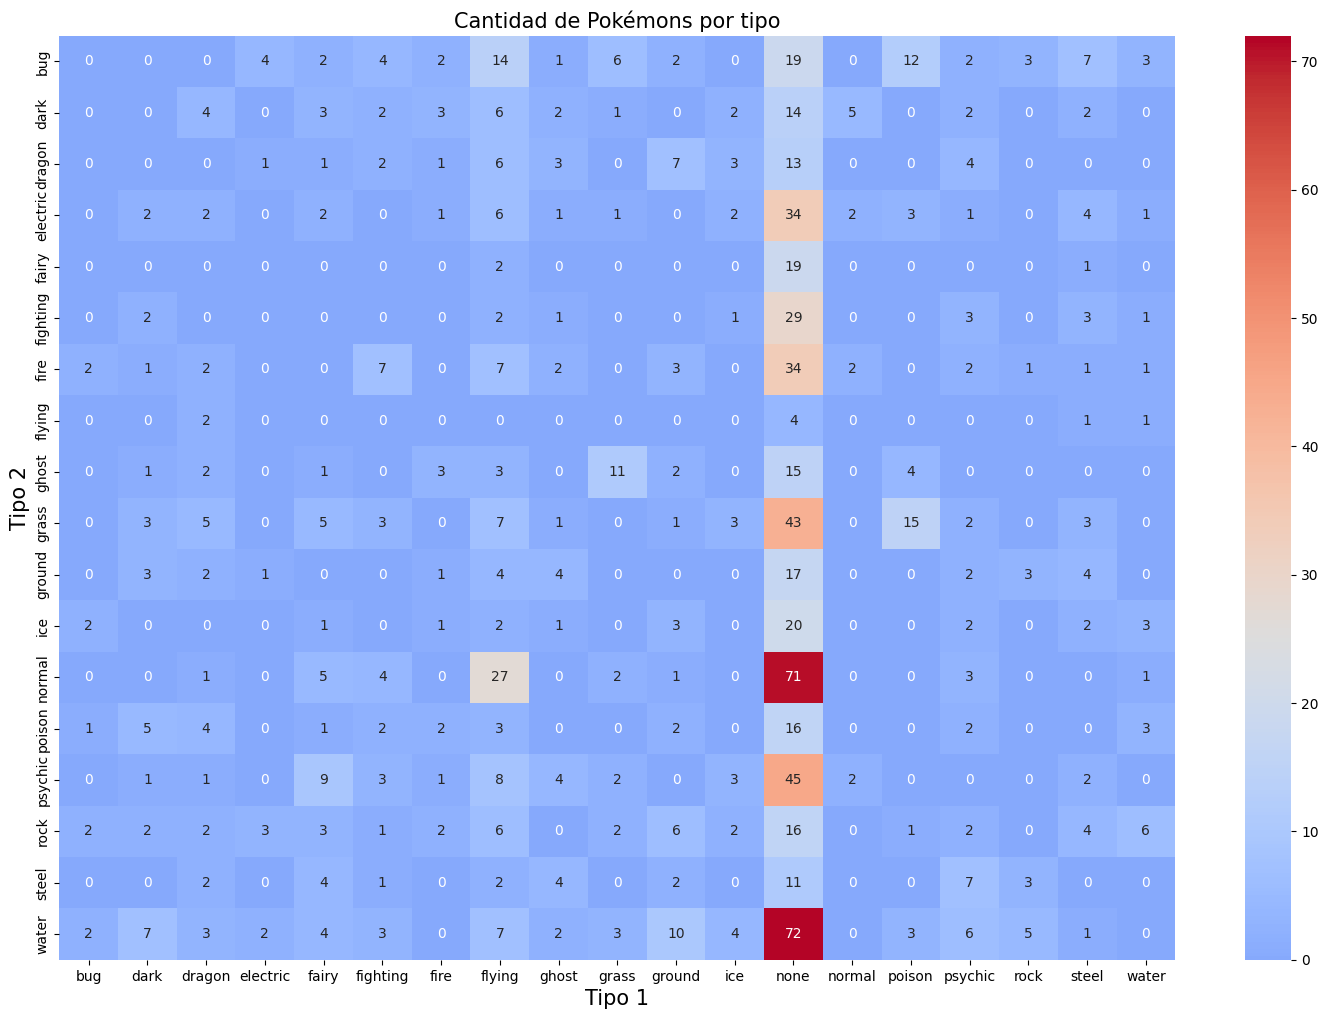

In [76]:
fig = plt.figure(figsize=(18, 12))

g = sns.heatmap(contar_tipos,
               cmap = 'coolwarm',
               annot = True,
               center = 25
               )

g.set_title('Cantidad de Pokémons por tipo', fontsize=15)

g.set_xlabel('Tipo 1', fontsize=15)
g.set_ylabel('Tipo 2', fontsize=15)


plt.show()

## Cuántos pokemon legendarios hay en cada generacion?

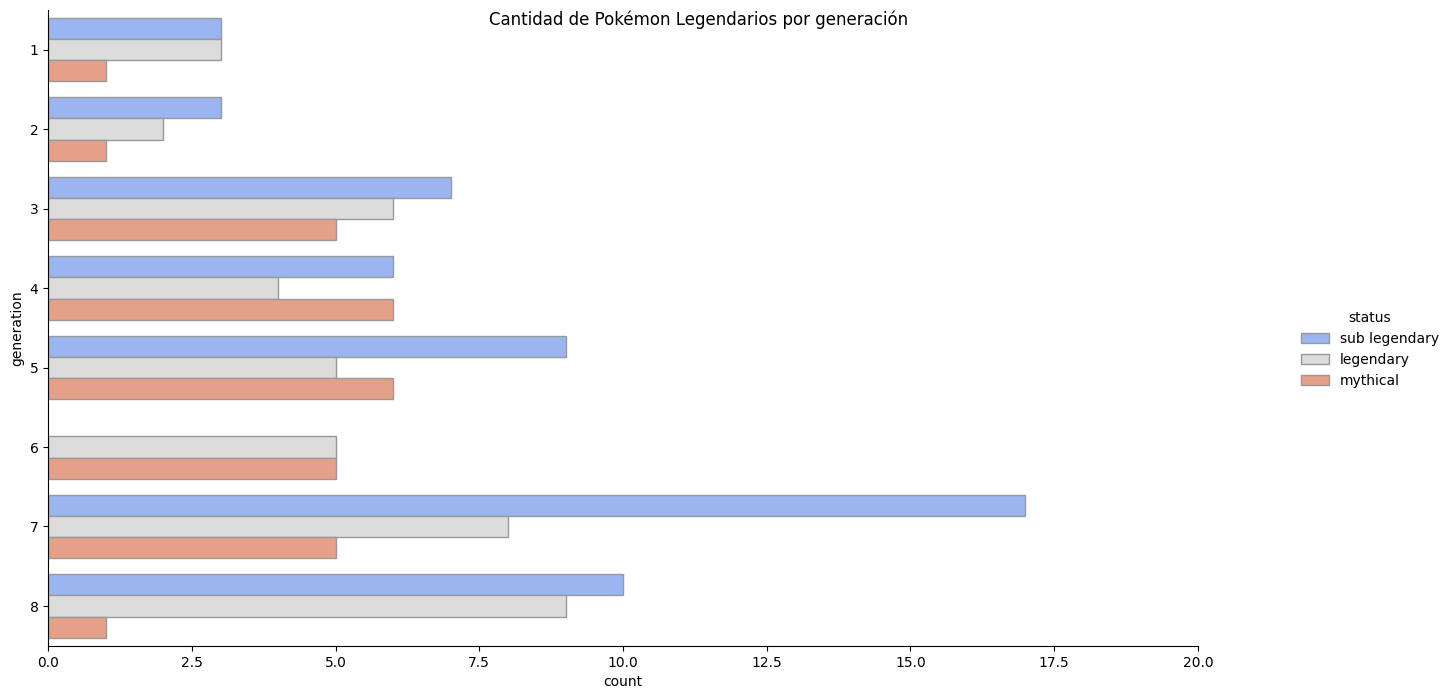

In [77]:

g = sns.catplot(data= df[df['status'] != 'normal'],
            y= "generation",
            kind= "count",
            palette= 'coolwarm',
            edgecolor= "0.6",
            hue= 'status', # Introducir el HUE
            height= 8,
            legend_out = True
               )

g.fig.suptitle('Cantidad de Pokémon Legendarios por generación')
g.fig.set_size_inches(15,7)


g.set(xlim=(0, 20))


plt.show()

## Su poder ha ido cambiando por generaciones?

A ver, qué entendemos por poder en un Pokémon? Podría ser, por ejemplo, la suma de todas sus características. A sí que lo que haremos será añadir una columna a nuestro dataframe, haciendo esta suma:

In [78]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'percentage_male', 'weight_kg'],
      dtype='object')

In [79]:
stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']

In [80]:
df['total'] = df[stat_columns].sum(axis=1)

In [81]:
df['total']

0       318
1       405
2       525
3       625
4       309
       ... 
1040    580
1041    580
1042    500
1043    680
1044    680
Name: total, Length: 1045, dtype: int64

Vamos a hacer una gráfica que compare los stats de los pokémos por distintas generaciones, para ver cuál es la más poderosa. Para comprobar este tipo de informaciones, lo ideal es usar un boxplot, así podemos tener más control sobre el poder de todos los pokémon!

Text(0.5, 0.98, 'Poder de los Pokémon por generación')

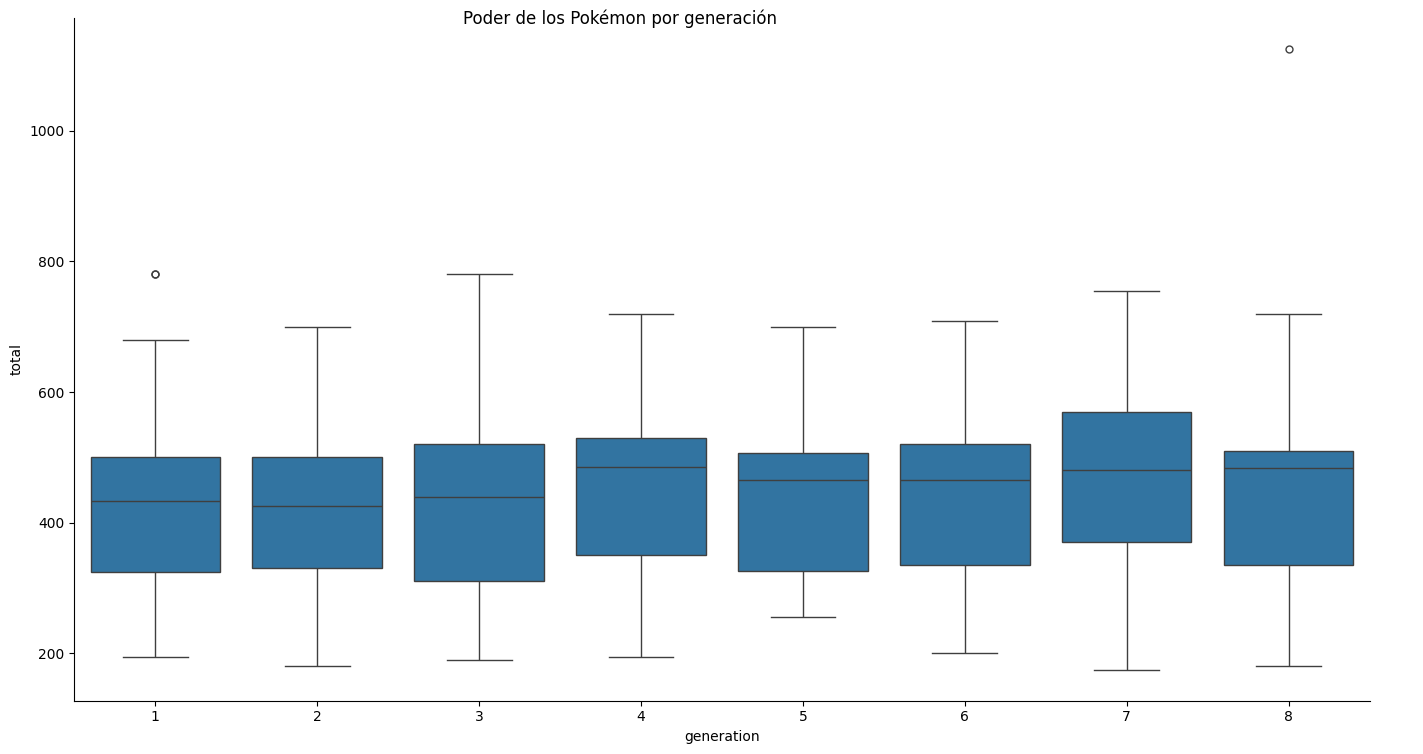

In [82]:
g = sns.catplot( data = df,
                 x = 'generation',
                 y = 'total',
                 kind = 'box'
               )

g.fig.set_size_inches(16, 8)

g.fig.suptitle('Poder de los Pokémon por generación')


## Qué tipo de pokémon es el más poderoso? Y el menos poderoso?

Esta es facil, ya que tenemos la columna 'Total', podemos hacer simplemente un gráfico de barras para ver las diferencias.

In [83]:
df['total']

0       318
1       405
2       525
3       625
4       309
       ... 
1040    580
1041    580
1042    500
1043    680
1044    680
Name: total, Length: 1045, dtype: int64

In [84]:
data = df.groupby('type_1')['total'].mean().sort_values(ascending= False)

Text(0.5, 0.98, 'Poder de los Pokémon por generación')

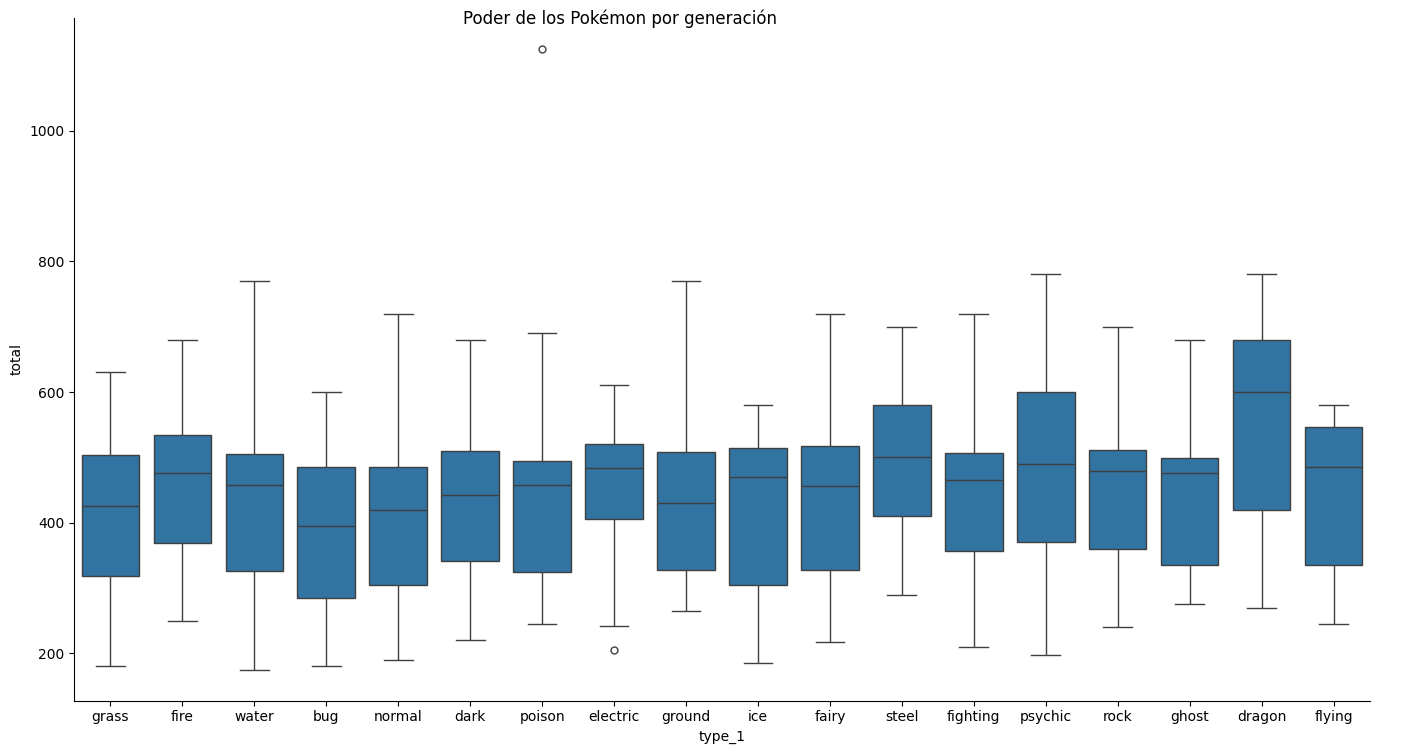

In [85]:
g = sns.catplot( data = df,
                 x = 'type_1',
                 y = 'total',
                 kind = 'box'
               )

g.fig.set_size_inches(16, 8)

g.fig.suptitle('Poder de los Pokémon por generación')

Pero vamos a hacer algo un poco más interesante aquí. Vamos a construir una función que nos devuelva una visualizacion comparando varios tipos de pokémons y sus stats, o características medias. Y lo haremos con una visualización super chula, una gráfica polar.

Para ello, también importaremos `Plotly` con el método que hemos aprendido en el apartado de visualización

In [86]:
import plotly.graph_objects as go
import plotly.offline as pyo
pyo.init_notebook_mode()

Output hidden; open in https://colab.research.google.com to view.

Como siempre, lo primero que necesitaremos son los datos. Y ya que vamos a usar un Radar Chart, que veremos ahora mismo, tenemos que saber que tendremos que generar los stats por cada tipo de pokémon y sus datos medios en cada área.

In [87]:
def stats_medios(tipo):

    stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']

    return df.loc[df['type_1'] == tipo, stat_columns].mean()

In [88]:
tipo_agua = stats_medios('water')
tipo_fuego = stats_medios('fire')

In [89]:
fig = go.Figure()

fig.add_trace( go.Scatterpolar( r = tipo_agua.values,
                               theta = tipo_agua.index,
                               name = 'water',
                              fill = 'toself'))

fig.add_trace( go.Scatterpolar( r = tipo_fuego.values,
                               theta = tipo_fuego.index,
                               name = 'fire',
                              fill = 'toself'))


fig.update_layout(showlegend=True)

fig.show()

In [90]:
def comparar_stats(df, lista_tipos):

    fig = go.Figure()

    for tipo in lista_tipos:

        stats = stats_medios(tipo)

        fig.add_trace( go.Scatterpolar( r = stats.values,
                                       theta = stats.index,
                                       name = tipo,
                                      fill = 'toself',
                                      opacity = 0.5,
                                      hoveron = 'points',
                                      hovertemplate = "%{theta}: %{r}"
                                      ))



    fig.update_layout(showlegend=True,
                      polar={'radialaxis': {'visible': False}},
                     template='plotly_white')

    fig.show()

In [91]:
lista_tipos = ['water', 'fire', 'poison', 'dragon']

comparar_stats(df, lista_tipos)

##### Bonus! También la podemos adaptar para comparar Pokémons individuales!

In [92]:
def comparar_pokemons(dataframe, pokemon_list):

    stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']

    fig = go.Figure()

    for pokemon in pokemon_list:

        datos = dataframe[dataframe['name'] == pokemon][stat_columns].squeeze()
        valores = datos.values.tolist()
        columnas = datos.index.tolist()

        fig.add_trace(
                    go.Scatterpolar(
                                r= valores,
                                theta= columnas,
                                name=pokemon,
                                fill='toself',
                                hoverinfo= 'text+theta+name'
                                )
                            )

    fig.update_layout(
                        title=go.layout.Title(text='Comparacion Pokémon'),
                        polar={'radialaxis': {'visible': False}},
                        showlegend=True
                     )


    fig.show()

In [93]:
pokemons = ['Rayquaza', 'Mimikyu', 'Pikachu']

comparar_pokemons(df, pokemons,
                  #pokemon_colors
                 )

##### Incluso podemos incluir una diccionario de qué color corresponde a cada tipo y hacer que se muestren!

In [94]:
pokemon_colors = {'normal': '#A8A77A',
'fire': '#EE8130',
'water': '#6390F0',
'electric': '#F7D02C',
'grass': '#7AC74C',
'ice': '#96D9D6',
'fighting': '#C22E28',
'poison': '#A33EA1',
'ground': '#E2BF65',
'flying': '#A98FF3',
'psychic': '#F95587',
'bug': '#A6B91A',
'rock': '#B6A136',
'ghost': '#735797',
'dragon': '#6F35FC',
'dark': '#705746',
'steel': '#B7B7CE',
'fairy': '#D685AD'}

In [95]:
def comparar_pokemons(dataframe, pokemon_list):

    colors = {'normal': '#A8A77A',
                        'fire': '#EE8130',
                        'water': '#6390F0',
                        'electric': '#F7D02C',
                        'grass': '#7AC74C',
                        'ice': '#96D9D6',
                        'fighting': '#C22E28',
                        'poison': '#A33EA1',
                        'ground': '#E2BF65',
                        'flying': '#A98FF3',
                        'psychic': '#F95587',
                        'bug': '#A6B91A',
                        'rock': '#B6A136',
                        'ghost': '#735797',
                        'dragon': '#6F35FC',
                        'dark': '#705746',
                        'steel': '#B7B7CE',
                        'fairy': '#D685AD'}

    stat_columns = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense','speed']

    fig = go.Figure()

    for pokemon in pokemon_list:

        datos = dataframe[dataframe['name'] == pokemon][stat_columns].squeeze()

        pokecolor = dataframe[dataframe['name'] == pokemon]['type_1'].squeeze()

        valores = datos.values.tolist()
        columnas = datos.index.tolist()

        fig.add_trace(
                    go.Scatterpolar(
                                r= valores,
                                theta= columnas,
                                name=pokemon,
                                fill='toself',
                                fillcolor = colors[pokecolor],
                                marker_line_color = colors[pokecolor],
                                opacity=0.7,
                                hovertemplate = "%{theta}: %{r}",
                                hoveron = "points", #"fills", "points+fills"'
                                )
                            )

    fig.update_layout(
                        title=go.layout.Title(text='Comparacion Pokémon por Stats'),
                        polar={'radialaxis': {'visible': False}},
                        showlegend=True,
                        template="plotly_white"
                     )


    fig.show()

In [96]:
pokemons = ['Squirtle', 'Charmander', 'Bulbasaur']

comparar_pokemons(df, pokemons)

## Cuáles son los pokémon más grandes? Y los más pesados? Y cuáles son menos densos?

Vale, 3 preguntas a la vez. Vamos por partes que nos volvemos locos. La primera:

In [97]:
df.sort_values(by='height_m', ascending=False)

# Luego

df.sort_values(by='height_m', ascending=False)[['name','height_m']].set_index('name')[:5]

# asignar a variable

mas_grandes = df.sort_values(by='height_m', ascending=False)[['name','height_m']].set_index('name')[:5]

# Explicar que conviene hacer el squeeze() cuando tenemos un dataframe con sólo una fila

mas_grandes = mas_grandes.squeeze()

Hacemos exactamente lo mismo, pero cambiando la altura por el peso

In [98]:
df.sort_values(by='weight_kg', ascending=False)[['name','weight_kg']].set_index('name')[:20]

# asignar a variable

mas_altos = df.sort_values(by='weight_kg', ascending=False)[['name','weight_kg']].set_index('name')[:5].squeeze()

Vale, ahora nos preguntan cuál es menos denso. Y la densidad, no podemos calcularla, ya que disponemos de altura y peso, pero no disponemos de volumen, que es una medida tridimensional. A si que vamos a llamar al cliente y decirle que se vaya a tomar por c(corte) que no podemos atender a esta petición, ya que no disponemos de los datos suficientes. Sin embargo, ya que sabemos la altura y el peso de nuestros pokémon, podemos calcular el BMI (Body Mass Index) o en castellano el Indice de Masa Corporal. El cliente nos dirá que ok y procederemos a hacer lo siguiente:

In [99]:
df['BMI'] = df['weight_kg'] / df['height_m']

df.sort_values(by='BMI', ascending=True)[['name','BMI']].set_index('name')[:5] # CAMBIAR ASCENDING!!!

# asignar a variable

mas_ligeros = df.sort_values(by='BMI', ascending=True)[['name','BMI']].set_index('name')[:5].squeeze()

Ahora lo que vamos a hacer es construir una visualización que contenga los tres tipos de información. O construir 3 visualizaciones en una? Es lo que haremos, una visualización con múltiples axes. Esto no lo hemos mirado, a sí que aprenderemos a hacerlo ahora.


In [100]:
mas_ligeros

name
Haunter    0.062500
Gastly     0.076923
Kartana    0.333333
Cursola    0.400000
Cosmog     0.500000
Name: BMI, dtype: float64

In [101]:
mas_ligeros.index

Index(['Haunter', 'Gastly', 'Kartana', 'Cursola', 'Cosmog'], dtype='object', name='name')

<ipython-input-102-72d0a3fe1d00>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-102-72d0a3fe1d00>:11: UserWarning:

FixedFormatter should only be used together with FixedLocator

<ipython-input-102-72d0a3fe1d00>:19: UserWarning:

FixedFormatter should only be used together with FixedLocator



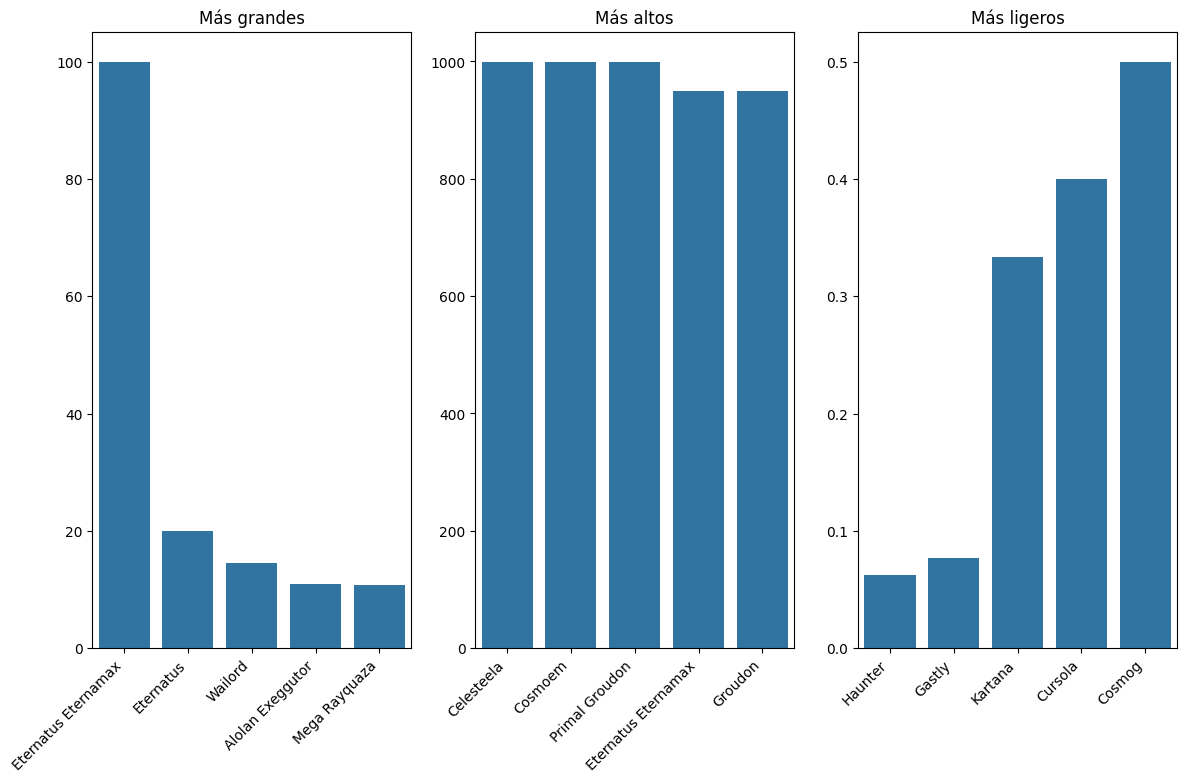

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 8), sharey=False, sharex=False)

sns.barplot(ax=ax1, x=mas_grandes.index, y=mas_grandes.values)
ax1.set_title('Más grandes')
ax1.set_xticklabels(ax1.get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')
ax1.set(xlabel=None)
sns.barplot(ax=ax2, x=mas_altos.index, y=mas_altos.values)
ax2.set_title('Más altos')
ax2.set_xticklabels(ax2.get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')
ax2.set(xlabel=None)


sns.barplot(ax=ax3, x=mas_ligeros.index, y=mas_ligeros.values)
ax3.set_title('Más ligeros')
ax3.set_xticklabels(ax3.get_xticklabels(),
                          rotation=45,
                          horizontalalignment='right')
ax3.set(xlabel=None)

plt.show()

## Qué porcentaje de Pokémon son hembras? y macho?

Bueno, una facil! Que alegría. Para complicarlo un poquito solo, vamos a diferenciar también por tipos de pokémon. Pero antes, tendremos que crear una columna más en nuestro dataframe. Sabemos cuál es el porcentaje de pokémon macho en nuestros datos, pero para representar gráficamente estos datos también tendremos que indicar explícitamente cuántos son hembra! A sí que crearemos una columna con esta información:

In [103]:
df['percentage_female'] = 100 - df['percentage_male']

Para ver si ha funcionado correctamente, comprobamos las medias:

In [104]:
df['percentage_female'].mean()

54.21052631578947

In [105]:
import plotly.express as px

In [106]:
femenino = df['percentage_female'].mean()
masculino = df['percentage_male'].mean()

fig = px.pie(values=[femenino, masculino],
             names=['Femenino', 'Masculino'],
             title='% de sexos en Pokémon')

fig.show()

## Qué Pokémon tienen más defensa que ataque y viceversa?

In [107]:
df.columns

Index(['pokedex_number', 'name', 'generation', 'status', 'type_1', 'type_2',
       'height_m', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense',
       'speed', 'catch_rate', 'percentage_male', 'weight_kg', 'total', 'BMI',
       'percentage_female'],
      dtype='object')

In [108]:
# Visualizando pokémos con más ataque que defensa usando df.query()

df.query('attack > defense')

,pokedex_number,name,generation,status,type_1,type_2,height_m,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,percentage_male,weight_kg,total,BMI,percentage_female
4,4,Charmander,1,normal,fire,none,0.6,39,52,43,60,50,65,45.0,87.5,8.5,309,14.166667,12.5
5,5,Charmeleon,1,normal,fire,none,1.1,58,64,58,80,65,80,45.0,87.5,19.0,405,17.272727,12.5
6,6,Charizard,1,normal,fire,flying,1.7,78,84,78,109,85,100,45.0,87.5,90.5,534,53.235294,12.5
7,6,Mega Charizard X,1,normal,fire,dragon,1.7,78,130,111,130,85,100,45.0,87.5,110.5,634,65.000000,12.5
8,6,Mega Charizard Y,1,normal,fire,flying,1.7,78,104,78,159,115,100,45.0,87.5,100.5,634,59.117647,12.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,895,Regidrago,8,sub legendary,dragon,none,2.1,200,100,50,100,50,80,3.0,0.0,200.0,580,95.238095,100.0
1040,896,Glastrier,8,sub legendary,ice,none,2.2,100,145,130,65,110,30,3.0,0.0,800.0,580,363.636364,100.0
1041,897,Spectrier,8,sub legendary,ghost,none,2.0,100,65,60,145,80,130,3.0,0.0,44.5,580,22.250000,100.0
1043,898,Calyrex Ice Rider,8,legendary,psychic,ice,2.4,100,165,150,85,130,50,3.0,0.0,809.1,680,337.125000,100.0


Podemos buscar las correlaciones entre defensa y ataque haciendo un scatterplot, además podremos incluir otras variables, como el tipo con el color, o el poder con el tamaño de la burbuja!

In [109]:
linea = pd.DataFrame(dict(
    x = [0, 200],
    y = [0, 200]
))

In [110]:
fig1 = px.scatter(df, x='defense', y='attack',
                hover_data=['name'], color='type_1')

fig2 = px.line(linea, x='x', y='y')

fig2.update_traces(line_color='black')

fig3 = go.Figure(data=fig1.data + fig2.data)

fig3.update_layout( title='Pokémons por ataque/defensa',
                    xaxis_title = 'Defensa',
                    yaxis_title = 'Ataque')

fig3.show()

# Felicidades!!

Hemos acabado el contenido de este curso. He hecho un pequeño video de despedida a continuación.

No olvidéis realizar vuestro propio proyecto de Ciencia de Datos que os he dejado en el curso. Compartidlo por los foros del curso, y os animo también a comentar el del resto de vuestr@s compañer@s!

![](https://c.tenor.com/iBLzg9X4HbQAAAAC/clapping-leonardo-dicaprio.gif)